In [31]:
import pandas as pd

def load_data():
    return pd.read_csv("datasets/ckd.csv")
data = load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
data = train_set.drop(labels=["CKD_Stage", "CKD_Progression"], axis=1)
labels = train_set.drop(labels=data.columns, axis=1)
labels_stage = train_set["CKD_Stage"].copy()
labels_progression = train_set["CKD_Progression"].copy()

In [33]:
#scales the data and fills in missing values with the median
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', MinMaxScaler()),
])
data = num_pipeline.fit_transform(data)

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(6, activation="softmax")
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [39]:
train_set = data[:800]
validation_set = data[800:]
train_stage = labels_stage[:800]
validation_stage = labels_stage[800:]

history = model.fit(train_set, train_stage, epochs=30, validation_data=(validation_set, validation_stage))

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7637 - loss: 0.6905 - val_accuracy: 0.7364 - val_loss: 0.6933
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7528 - loss: 0.6766 - val_accuracy: 0.7273 - val_loss: 0.6820
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7474 - loss: 0.6627 - val_accuracy: 0.7545 - val_loss: 0.6622
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7565 - loss: 0.6506 - val_accuracy: 0.7545 - val_loss: 0.6417
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7744 - loss: 0.6384 - val_accuracy: 0.7636 - val_loss: 0.6300
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7852 - loss: 0.6218 - val_accuracy: 0.7636 - val_loss: 0.6185
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7896 - loss: 0.6039 - val_accuracy: 0.7727 - val_loss: 0.6051
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7923 - loss: 0.6108 - val_accuracy: 0.8000 - v

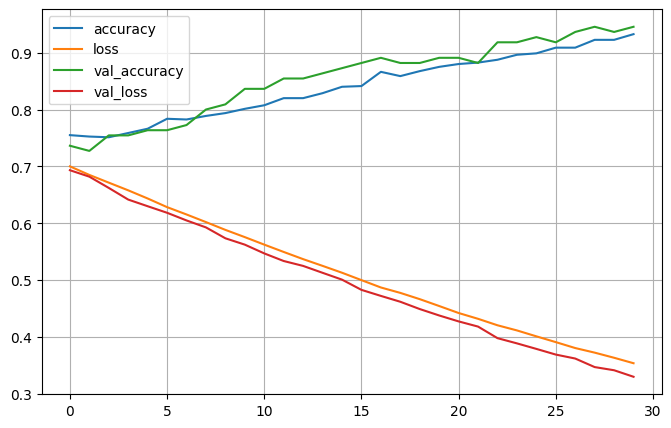

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()